# Tweet Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import json

In [2]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [3]:
tweets = pd.read_csv("data/tweets_v2.csv")

In [5]:
pysqldf("SELECT * FROM tweets LIMIT 10;")

,created_at,favorite_count,in_reply_to_screen_name,is_quote_status,retweet_count,retweeted,screen_name,text,user_id
0,2008-08-04 17:28:51,0,None,0,0,0,JohnBoozman,On a conference call about a weekend trip to I...,5558312
1,2008-08-06 19:04:45,0,None,0,0,0,JohnBoozman,Being interviewed by KTHV,5558312
2,2008-08-06 20:35:36,0,None,0,0,0,JohnBoozman,Being interviewed by KARN on his Arkansas Worl...,5558312
3,2008-08-07 13:52:52,0,None,0,0,0,JohnBoozman,"On KWHN in Fort Smith, that's 1320 AM",5558312
4,2008-08-07 15:12:05,0,None,0,0,0,JohnBoozman,Attending a Military of the Purple Heart Cerem...,5558312
5,2008-08-07 18:35:25,0,None,0,0,0,JohnBoozman,Touring Helath South Hospital in Fayetteville,5558312
6,2008-08-18 14:07:35,0,None,0,0,0,JohnBoozman,conducting a veterans affairs economic opportu...,5558312
7,2008-08-20 12:18:43,0,None,0,0,0,JohnBoozman,doing an interview on kurm radio,5558312
8,2008-08-21 16:24:07,0,None,0,0,0,JohnBoozman,Meeting with Emergency Management officials fr...,5558312
9,2008-08-28 18:38:20,0,None,0,0,0,JohnBoozman,Listening to constituents at a roundtable disc...,5558312


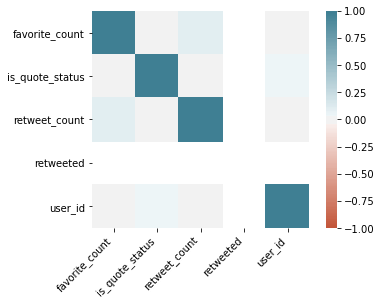

In [6]:
import seaborn as sns

corr = tweets.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [4]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

#sw_df = pd.DataFrame(stopwords, columns=["stopword"])

## Word Frequency

In [ ]:
'''
from collections import Counter
no_sw = tweets.text.apply(lambda word: [word.lower for word in word.split(' ') if word.lower() not in stopwords])

corpus = []

for ea in no_sw:
    corpus += ea
    
wordDict = Counter(corpus)

[ (k,v) for k,v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True) [:20]]'''

In [9]:
pysqldf("SELECT min(created_at), max(created_at) FROM tweets")

,min(created_at),max(created_at)
0,2008-08-04 17:28:51,2017-06-06 17:16:00


In [9]:
from wordcloud import WordCloud
from collections import Counter

def calc_and_display_wc(df, stopwords):

    df["text_no_sw"]= df["text"].apply(lambda word: [word.lower() for word in word.split(' ') if word.lower() not in stopwords])
    
    year_corpus = []

    for ea in df.text_no_sw:
        year_corpus += ea
    
    wordDict = Counter(year_corpus)
    
    wordcloud = WordCloud().generate_from_frequencies(wordDict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


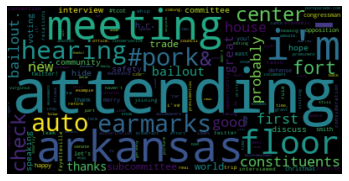

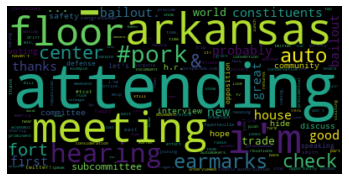

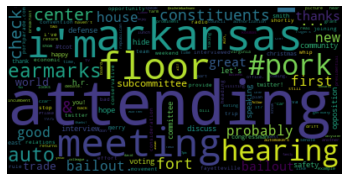

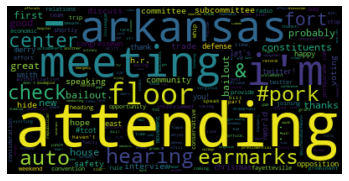

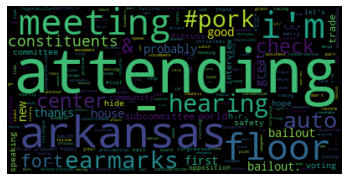

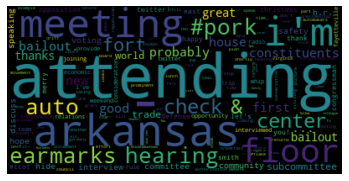

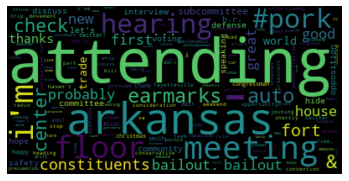

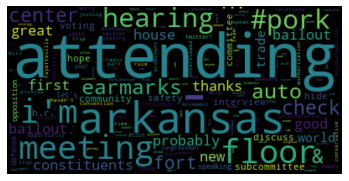

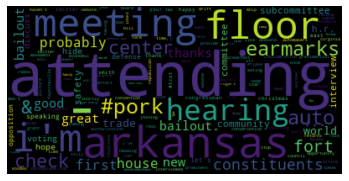

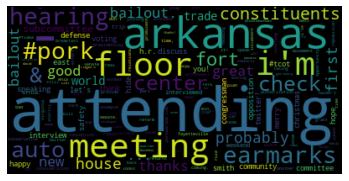

In [11]:
years = list(range(2008,2018))

for year in years:
    print("year is", year)
    tw_yr = pysqldf("SELECT text FROM tweets WHERE strftime('%Y', created_at) ='"+str(years[0]) + "'")
    calc_and_display_wc(tw_yr, stopwords)
    

## Sentiment Analysis

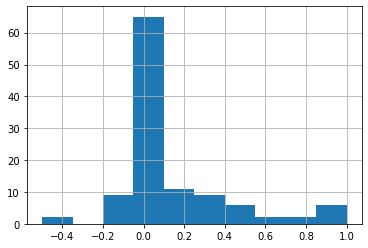

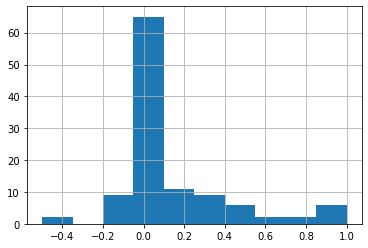

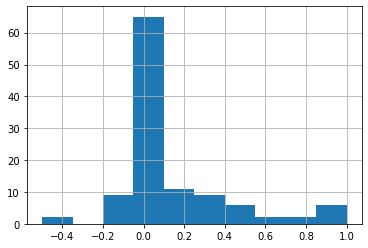

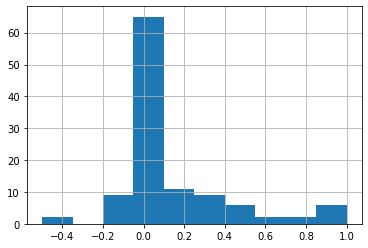

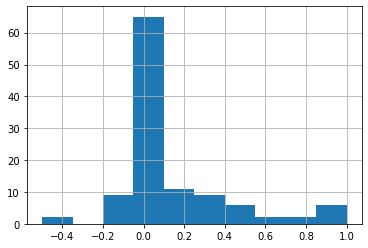

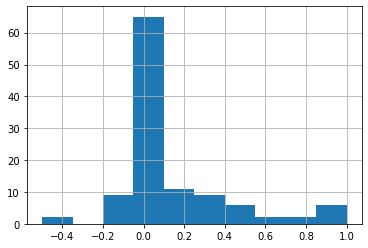

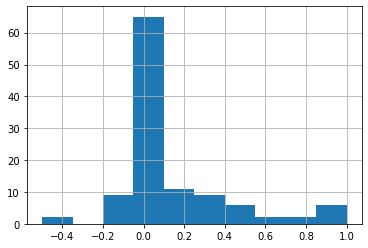

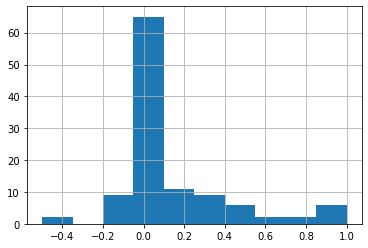

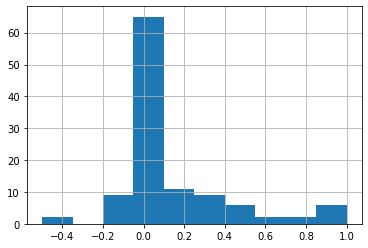

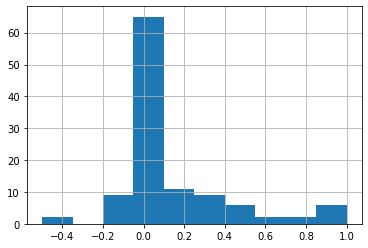

In [14]:
from textblob import TextBlob

for year in years:
    print("year is", year)
    tw_yr = pysqldf("SELECT text FROM tweets WHERE strftime('%Y', created_at) ='"+str(years[0]) + "'")
    tw_yr["sentiment"] = tw_yr.text.apply(lambda text: TextBlob(text).sentiment[0])
    display(tw_yr.sentiment.hist())
    plt.show()

## Additional Graphs

   year   count
0  2008     112
1  2009    8234
2  2010   13763
3  2011   35163
4  2012   50791
5  2013  124439
6  2014  168308
7  2015  258256
8  2016  354942
9  2017  229362
Index(['year', 'count'], dtype='object')


[]

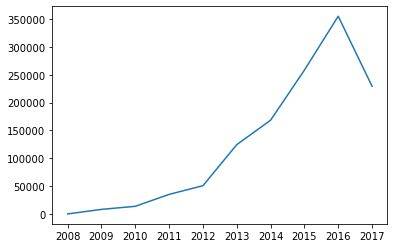

In [26]:
tw_yr = pysqldf("SELECT strftime('%Y', created_at) as year, count(*) as count FROM tweets GROUP BY year ORDER BY year")
print(tw_yr.head(50))
plt.plot(tw_yr["year"], tw_yr["count"])
plt.plot()


   hour   count
0    00   36344
1    01   28776
2    02   23994
3    03   14763
4    04    7705
5    05    3449
6    06    1635
7    07     745
8    08     451
9    09     538
10   10    2327
11   11    7876
12   12   21322
13   13   62610
14   14  102389
15   15  117807
16   16  117923
17   17  112485
18   18  117058
19   19  116357
20   20  114325
21   21  102386
22   22   77369
23   23   52736


[]

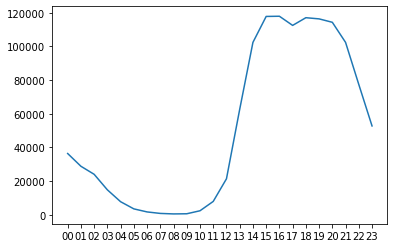

In [28]:
tw_hr = pysqldf("SELECT strftime('%H', created_at) as hour, count(*) as count FROM tweets GROUP BY hour ORDER BY hour")
print(tw_hr.head(50))
plt.plot(tw_hr["hour"], tw_hr["count"])
plt.plot()

   month  count
0     00  37874
1     01  22854
2     02  21538
3     03  20743
4     04  20582
5     05  23075
6     06  20132
7     07  20198
8     08  20156
9     09  19920
10    10  22066
11    11  19938
12    12  19862
13    13  19811
14    14  19683
15    15  24497
16    16  20251
17    17  19859
18    18  19696
19    19  19616
20    20  21930
21    21  19758
22    22  20165
23    23  19630
24    24  19543
25    25  21223
26    26  19805
27    27  19817
28    28  19859
29    29  19422
30    30  29004
31    31  20818
32    32  20257
33    33  19906
34    34  19770
35    35  21745
36    36  19986
37    37  19641
38    38  19376
39    39  19294
40    40  21300
41    41  19471
42    42  19928
43    43  19470
44    44  19344
45    45  24100
46    46  19878
47    47  19560
48    48  19668
49    49  19534


[]

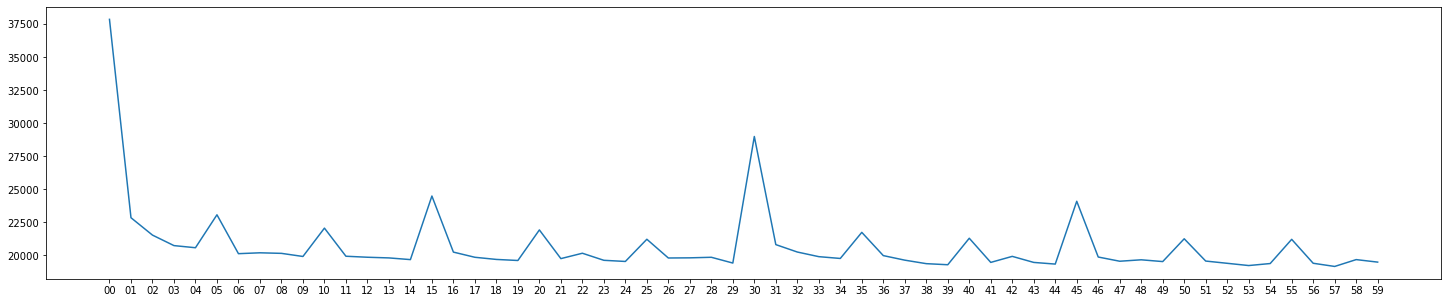

In [50]:
#tw_m = pysqldf("SELECT strftime('%M', created_at) as month, count(*) as count FROM tweets GROUP BY month ORDER BY month")
print(tw_m.head(50))
plt.plot(tw_m["month"], tw_m["count"])
plt.rcParams["figure.figsize"]=20,5
plt.plot()